In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
file = pd.read_csv("../data/raw/Avaliacao_Mensal_Funcionarios.csv")
file

,Cargo,Setor,Salário Bruto,Tipo de Contratação,Carga Horária por dia,Formação,Idade,NPS interno
0,Cientista de Dados,Dados,6000,CLT,8,Bacharel,24,9
1,Cientista de Dados,Dados,6500,CLT,8,Bacharel,26,"9,6"
2,Analista de Dados,Dados,5000,CLT,8,Bacharel,29,8
3,Analista de Dados,Dados,5800,CLT,8,Bacharel,36,9
4,Analista de Dados,Dados,7000,CLT,8,Bacharel,32,"9,4"
...,...,...,...,...,...,...,...,...
67,Gerente de Marketing,Marketing,6000,CLT,8,Bacharel,46,9
68,Coordenador de Marketing,Marketing,8000,CLT,8,Bacharel,45,9
69,Gerente Comercial,Marketing,8000,CLT,8,Bacharel,32,"9,4"
70,Gerente Comercial,Marketing,8000,CLT,8,Bacharel,40,"9,6"


In [30]:
file['NPS interno'] = file['NPS interno'].str.replace(',', '.').astype('float')

In [31]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Cargo                  72 non-null     object 
 1   Setor                  72 non-null     object 
 2   Salário Bruto          72 non-null     int64  
 3   Tipo de Contratação    72 non-null     object 
 4   Carga Horária por dia  72 non-null     int64  
 5   Formação               72 non-null     object 
 6   Idade                  72 non-null     int64  
 7   NPS interno            72 non-null     float64
dtypes: float64(1), int64(3), object(4)
memory usage: 4.6+ KB


In [9]:
file.Setor = file.Setor.replace("Engenheiro de Software", "Engenharia de Software")

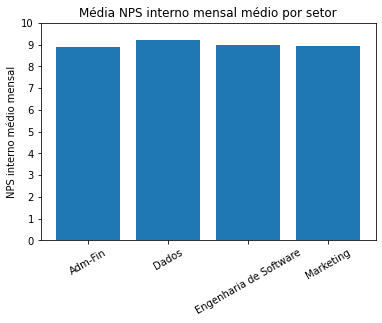

In [21]:
setores = file.groupby(["Setor"]).mean()["NPS interno"].index
nps_medio_por_setor = file.groupby(["Setor"]).mean()["NPS interno"].values

plt.bar(setores, nps_medio_por_setor)
plt.ylabel("NPS interno médio mensal")
plt.xticks(rotation = 30)
plt.yticks(np.array(range(0,11,1)))
plt.title("Média NPS interno mensal médio por setor");

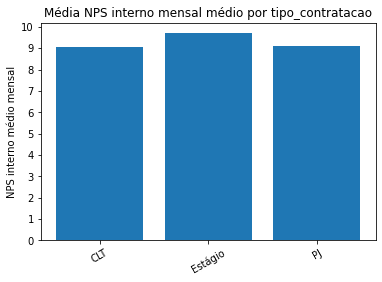

In [23]:
tipo_contratacao = file.groupby(["Tipo de Contratação"]).mean()["NPS interno"].index
nps_medio_por_tipo_contratacao = file.groupby(["Tipo de Contratação"]).mean()["NPS interno"].values

plt.bar(tipo_contratacao, nps_medio_por_tipo_contratacao)
plt.ylabel("NPS interno médio mensal")
plt.xticks(rotation = 30)
plt.yticks(np.array(range(0,11,1)))
plt.title("Média NPS interno mensal médio por tipo_contratacao");

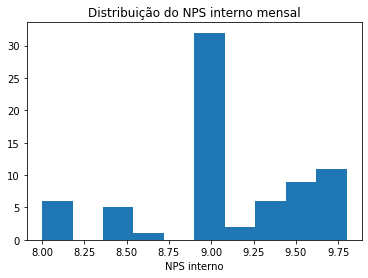

In [27]:
plt.hist(file["NPS interno"])
plt.title("Distribuição do NPS interno mensal")
plt.xlabel("NPS interno");